In [8]:
from transformers import GPT2LMHeadModel

In [11]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2') #124M
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

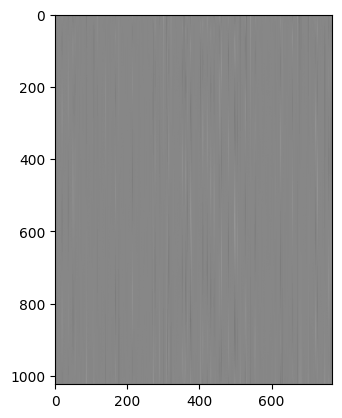

In [12]:
import matplotlib.pyplot as plt
plt.imshow(sd_hf['transformer.wpe.weight'], cmap='gray')

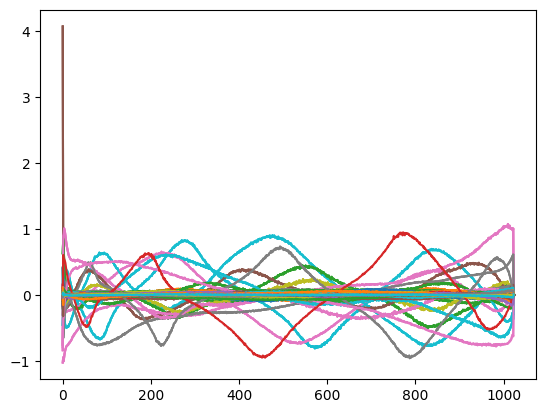

In [16]:
plt.plot(sd_hf['transformer.wpe.weight'][:, :150])
plt.plot(sd_hf['transformer.wpe.weight'][:, :200])
plt.plot(sd_hf['transformer.wpe.weight'][:, :250])
plt.show()

In [25]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(21)
print(generator('Hello I am language model')[0]['generated_text'])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hello I am language model:

I am using the following syntax for writing XML-like code:

module.exports = [] class Data1 : def __init__ ( self, p, c ): try : p = p.


In [3]:
with open('data/input.txt', 'r') as f:
    data = f.read()

In [8]:
# with open('data/input.txt', 'w') as f:
#     f.write(data)

In [4]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])


[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [5]:
import torch

buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [14]:
# standard deviation grows inside the residual stream
x = torch.zeros(768)
n = 100 # e. g. 100 layers
for i in range(n):
    x += n**-0.5 * torch.randn(768)

print(x.std())

tensor(1.0027)
